In [1]:
from matminer.featurizers.composition.composite import ElementProperty, Meredig
from pymatgen.core import Composition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
save_dir=Path("featurize")
save_dir.mkdir(exist_ok=True)

C:\Users\74240\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv("../data/Phase_transformation_energy.csv")
df["third_element"]=df["structure"].apply(func=lambda x: x.split("4")[-1])
df["composition"]=df["third_element"].apply(lambda x: Composition(x))
df=df[["composition","Energy_fromOmega"]]
df.columns=["x","y"]
df.to_csv(save_dir / "df.csv", index=False)
df

,x,y
0,(Ag),0.455355
1,(Au),1.755696
2,(Ba),-6.998429
3,(Be),1.915584
4,(Bi),-1.718401
5,(Ca),-4.727483
6,(Cd),-0.589259
7,(Ce),-4.994793
8,(Co),3.607136
9,(Cr),1.427778


In [3]:
model_magpie = ElementProperty.from_preset("magpie", impute_nan=True)
model_magpie.citations()

['@article{ward_agrawal_choudary_wolverton_2016, title={A general-purpose machine learning framework for predicting properties of inorganic materials}, volume={2}, DOI={10.1038/npjcompumats.2017.28}, number={1}, journal={npj Computational Materials}, author={Ward, Logan and Agrawal, Ankit and Choudhary, Alok and Wolverton, Christopher}, year={2016}}']

# 使用matminer的magpie方法生成元素特征

In [4]:
model_magpie = ElementProperty.from_preset("magpie", impute_nan=True)
df_features_magpie = model_magpie.featurize_dataframe(df, col_id="x", ignore_errors=True)
df_features_magpie = df_features_magpie[df_features_magpie.columns.difference(df.columns)]
df_features_magpie = df_features_magpie.dropna(axis=0, how="any")
df_features_magpie = df_features_magpie.reset_index(drop=True)
df_features_magpie.to_csv(save_dir / "featurize_magpie.csv", index=False)
df_features_magpie

ElementProperty: 100%|██████████| 57/57 [00:00<00:00, 275.29it/s]


,MagpieData avg_dev AtomicWeight,MagpieData avg_dev Column,MagpieData avg_dev CovalentRadius,MagpieData avg_dev Electronegativity,MagpieData avg_dev GSbandgap,MagpieData avg_dev GSmagmom,MagpieData avg_dev GSvolume_pa,MagpieData avg_dev MeltingT,MagpieData avg_dev MendeleevNumber,MagpieData avg_dev NUnfilled,...,MagpieData range NdValence,MagpieData range NfUnfilled,MagpieData range NfValence,MagpieData range NpUnfilled,MagpieData range NpValence,MagpieData range NsUnfilled,MagpieData range NsValence,MagpieData range Number,MagpieData range Row,MagpieData range SpaceGroupNumber
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import re
def clean_features(data):
    columns_deleted = []

    # 删除复合列
    for col in data.columns:
        df = data[col]
        if len(df.shape) != 1:
            columns_deleted.append(data.pop(col))
            data[col] = df.iloc[:, 1]

    # 删除存在空白格的列
    cols_with_null = data.isnull().any(axis=0)
    cols_to_pop = cols_with_null[cols_with_null].index
    for col in cols_to_pop:
        columns_deleted.append(data.pop(col))

    # 删除str
    for col in data.columns:
        if data[col].dtype != object:
            continue
        if re.findall("[^0-9.-]", data[col][1]):
            columns_deleted.append(data.pop(col))
        else:
            data[col].astype(np.float64)

    # 如果有一列中超过50%的数据为同一数值，删除这一列
    for col in data.columns:
        value_counts_max = sorted(data[col].value_counts())[-1]
        if value_counts_max > len(data[col]) * 0.5:
            columns_deleted.append(data.pop(col))

    return data, columns_deleted

In [7]:
df_features= df_features_magpie
df_features = clean_features(df_features)[0]
df_features=df_features.loc[:, ~df_features.T.duplicated()]
df_features.to_csv(save_dir / "featurize.csv", index=False)
df_features

,MagpieData maximum AtomicWeight,MagpieData maximum Column,MagpieData maximum CovalentRadius,MagpieData maximum Electronegativity,MagpieData maximum GSvolume_pa,MagpieData maximum MeltingT,MagpieData maximum MendeleevNumber,MagpieData maximum NUnfilled,MagpieData maximum NValence,MagpieData maximum NdValence,MagpieData maximum Number,MagpieData maximum Row,MagpieData maximum SpaceGroupNumber
0,107.868200,11.0,145.0,1.930,16.330000,1234.93,65.0,1.0,11.0,10.0,47.0,5.0,225.0
1,196.966569,11.0,136.0,2.540,16.700000,1337.33,66.0,1.0,25.0,10.0,79.0,6.0,225.0
2,137.327000,2.0,215.0,0.890,63.590000,1000.00,9.0,0.0,2.0,0.0,56.0,6.0,229.0
3,9.012182,2.0,96.0,1.570,7.890000,1560.00,67.0,0.0,2.0,0.0,4.0,2.0,194.0
4,208.980400,15.0,148.0,2.020,32.950000,544.40,86.0,3.0,29.0,10.0,83.0,6.0,12.0
5,40.078000,2.0,176.0,1.000,37.770000,1115.00,7.0,0.0,2.0,0.0,20.0,4.0,225.0
6,112.411000,12.0,144.0,1.690,19.495000,594.22,70.0,0.0,12.0,10.0,48.0,5.0,194.0
7,140.116000,3.0,204.0,1.120,37.240000,1071.00,15.0,22.0,4.0,1.0,58.0,6.0,194.0
8,58.933195,9.0,126.0,1.880,10.245000,1768.00,58.0,3.0,9.0,7.0,27.0,4.0,194.0
9,51.996100,6.0,139.0,1.660,11.190000,2180.00,49.0,6.0,6.0,5.0,24.0,4.0,229.0


In [8]:
features_total=df_features.columns.to_list()
print(*features_total,sep = "\n")

MagpieData maximum AtomicWeight
MagpieData maximum Column
MagpieData maximum CovalentRadius
MagpieData maximum Electronegativity
MagpieData maximum GSvolume_pa
MagpieData maximum MeltingT
MagpieData maximum MendeleevNumber
MagpieData maximum NUnfilled
MagpieData maximum NValence
MagpieData maximum NdValence
MagpieData maximum Number
MagpieData maximum Row
MagpieData maximum SpaceGroupNumber


# Pearson特征筛选

In [9]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.axes._axes import Axes
from pltsci import whole_plot_set, half_plot_set, set_ticks, cm
whole_plot_set()

In [10]:
df_features=pd.read_csv(save_dir / "featurize.csv")
df_features

,MagpieData maximum AtomicWeight,MagpieData maximum Column,MagpieData maximum CovalentRadius,MagpieData maximum Electronegativity,MagpieData maximum GSvolume_pa,MagpieData maximum MeltingT,MagpieData maximum MendeleevNumber,MagpieData maximum NUnfilled,MagpieData maximum NValence,MagpieData maximum NdValence,MagpieData maximum Number,MagpieData maximum Row,MagpieData maximum SpaceGroupNumber
0,107.868200,11.0,145.0,1.930,16.330000,1234.93,65.0,1.0,11.0,10.0,47.0,5.0,225.0
1,196.966569,11.0,136.0,2.540,16.700000,1337.33,66.0,1.0,25.0,10.0,79.0,6.0,225.0
2,137.327000,2.0,215.0,0.890,63.590000,1000.00,9.0,0.0,2.0,0.0,56.0,6.0,229.0
3,9.012182,2.0,96.0,1.570,7.890000,1560.00,67.0,0.0,2.0,0.0,4.0,2.0,194.0
4,208.980400,15.0,148.0,2.020,32.950000,544.40,86.0,3.0,29.0,10.0,83.0,6.0,12.0
5,40.078000,2.0,176.0,1.000,37.770000,1115.00,7.0,0.0,2.0,0.0,20.0,4.0,225.0
6,112.411000,12.0,144.0,1.690,19.495000,594.22,70.0,0.0,12.0,10.0,48.0,5.0,194.0
7,140.116000,3.0,204.0,1.120,37.240000,1071.00,15.0,22.0,4.0,1.0,58.0,6.0,194.0
8,58.933195,9.0,126.0,1.880,10.245000,1768.00,58.0,3.0,9.0,7.0,27.0,4.0,194.0
9,51.996100,6.0,139.0,1.660,11.190000,2180.00,49.0,6.0,6.0,5.0,24.0,4.0,229.0


In [11]:
df_feature_corr= df_features.corr()
df_feature_corr

,MagpieData maximum AtomicWeight,MagpieData maximum Column,MagpieData maximum CovalentRadius,MagpieData maximum Electronegativity,MagpieData maximum GSvolume_pa,MagpieData maximum MeltingT,MagpieData maximum MendeleevNumber,MagpieData maximum NUnfilled,MagpieData maximum NValence,MagpieData maximum NdValence,MagpieData maximum Number,MagpieData maximum Row,MagpieData maximum SpaceGroupNumber
MagpieData maximum AtomicWeight,1.000000,0.242567,0.272785,0.272154,0.067335,0.258624,0.211114,0.197107,0.786974,0.174189,0.998801,0.930240,-0.186174
MagpieData maximum Column,0.242567,1.000000,-0.661849,0.783154,-0.349597,-0.160959,0.878229,-0.207923,0.641683,0.969089,0.249692,0.092141,-0.408474
MagpieData maximum CovalentRadius,0.272785,-0.661849,1.000000,-0.716091,0.731952,-0.050215,-0.765303,0.373711,-0.306926,-0.717378,0.281487,0.514453,0.131652
MagpieData maximum Electronegativity,0.272154,0.783154,-0.716091,1.000000,-0.618118,0.348486,0.816987,-0.165758,0.630085,0.830990,0.277533,0.109814,-0.113520
MagpieData maximum GSvolume_pa,0.067335,-0.349597,0.731952,-0.618118,1.000000,-0.493575,-0.534691,-0.036143,-0.275390,-0.420706,0.067805,0.221886,-0.011376
MagpieData maximum MeltingT,0.258624,-0.160959,-0.050215,0.348486,-0.493575,1.000000,0.050034,0.227987,0.186439,-0.086559,0.266009,0.274547,0.316633
MagpieData maximum MendeleevNumber,0.211114,0.878229,-0.765303,0.816987,-0.534691,0.050034,1.000000,-0.236527,0.640664,0.852442,0.212355,0.011415,-0.374091
MagpieData maximum NUnfilled,0.197107,-0.207923,0.373711,-0.165758,-0.036143,0.227987,-0.236527,1.000000,-0.089699,-0.248676,0.206096,0.330478,-0.093785
MagpieData maximum NValence,0.786974,0.641683,-0.306926,0.630085,-0.275390,0.186439,0.640664,-0.089699,1.000000,0.592961,0.778212,0.557969,-0.296263
MagpieData maximum NdValence,0.174189,0.969089,-0.717378,0.830990,-0.420706,-0.086559,0.852442,-0.248676,0.592961,1.000000,0.183724,0.031420,-0.280448



特征对应表 (Feature Mapping):
F1    | MagpieData maximum AtomicWeight       
F2    | MagpieData maximum Column             
F3    | MagpieData maximum CovalentRadius     
F4    | MagpieData maximum Electronegativity  
F5    | MagpieData maximum GSvolume_pa        
F6    | MagpieData maximum MeltingT           
F7    | MagpieData maximum MendeleevNumber    
F8    | MagpieData maximum NUnfilled          
F9    | MagpieData maximum NValence           
F10   | MagpieData maximum NdValence          
F11   | MagpieData maximum Number             
F12   | MagpieData maximum Row                
F13   | MagpieData maximum SpaceGroupNumber   


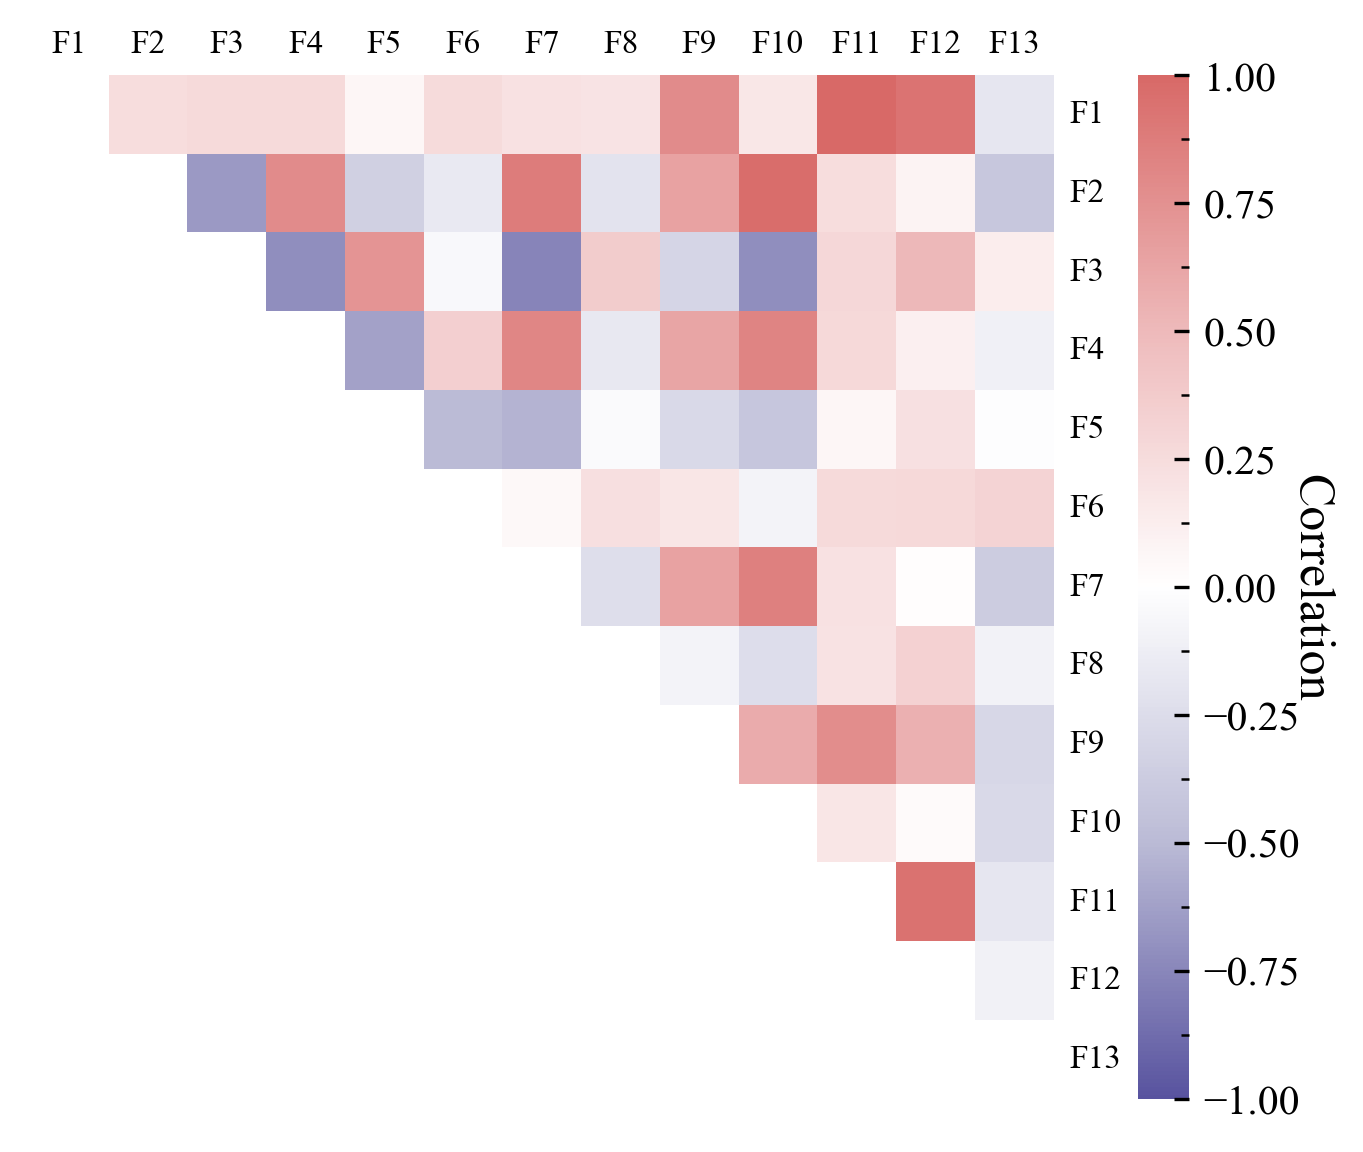

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(cm(15), cm(10)), dpi=300)

# 创建一个下三角形遮罩
mask = np.tril(np.ones_like(df_feature_corr, dtype=bool))

# 创建自定义颜色映射
cmap = colors.LinearSegmentedColormap.from_list(
    "", ["#58539f", "#bbbbd6", "white", "#eebabb", "#d86967"]
)


# 绘制热力图，将遮罩传递给参数 'mask'
ax = sns.heatmap(
    df_feature_corr,
    mask=mask,
    annot=False,
    square=True,
    xticklabels=False,
    yticklabels=False,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    cbar=False,
)

original_feature_names = df_feature_corr.columns.tolist()
n_features = len(original_feature_names)

# 创建简化的特征名 F1, F2, F3...
short_feature_names = [f'F{i+1}' for i in range(n_features)]

# 创建对应表字典
feature_mapping = {short_feature_names[i]: original_feature_names[i] for i in range(n_features)}

# 在热力图上方添加特征名称
for i, feature_name in enumerate(short_feature_names):
    # 计算文字位置
    x_pos = i + 0.5
    y_pos = - 0.2

    # 添加文字，设置旋转角度和对齐方式
    ax.text(x_pos, y_pos, feature_name, rotation=0, ha="center", va="bottom", fontsize=8, transform=ax.transData)
    x_pos = n_features +0.2
    y_pos = i+0.5
    ax.text(x_pos, y_pos, feature_name, rotation=0, ha="left", va="center", fontsize=8, transform=ax.transData)
# 打印特征对应表
print("\n" + "="*80)
print("特征对应表 (Feature Mapping):")
print("="*80)

# 确定列宽
max_short_len = max(len(name) for name in short_feature_names)
max_original_len = max(len(name) for name in original_feature_names)

for short_name, original_name in feature_mapping.items():
    print(f"{short_name:<{max_short_len+2}} | {original_name:<{max_original_len+2}}")
    
# 去除颜色条的边框并设置长度和图片相同
cbar = plt.colorbar(
    ax.get_children()[0],
    ax=ax,
    aspect=20,
    shrink=1.0,
    location="right",
    use_gridspec=True,
)
cbar.set_label('Correlation', rotation=270, labelpad=8,fontsize=12)

cbar.outline.set_visible(False)
cbar.ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # 设置颜色条的次刻度
# half_plot_set(cbar.ax)

# 显示图像
plt.tight_layout()


In [13]:
fig.savefig(save_dir / "feature_correlation.jpg", dpi=1200, bbox_inches='tight', )

In [14]:
feature_mapping_v={}
for k,v in feature_mapping.items():
    feature_mapping_v[v]=k
feature_mapping_v

{'MagpieData maximum AtomicWeight': 'F1',
 'MagpieData maximum Column': 'F2',
 'MagpieData maximum CovalentRadius': 'F3',
 'MagpieData maximum Electronegativity': 'F4',
 'MagpieData maximum GSvolume_pa': 'F5',
 'MagpieData maximum MeltingT': 'F6',
 'MagpieData maximum MendeleevNumber': 'F7',
 'MagpieData maximum NUnfilled': 'F8',
 'MagpieData maximum NValence': 'F9',
 'MagpieData maximum NdValence': 'F10',
 'MagpieData maximum Number': 'F11',
 'MagpieData maximum Row': 'F12',
 'MagpieData maximum SpaceGroupNumber': 'F13'}

In [15]:
high_corr_pairs = []
for i in range(len(df_feature_corr.columns)):
    for j in range(i+1, len(df_feature_corr.columns)):
        if abs(df_feature_corr.iloc[i,j]) > 0.8:
            high_corr_pairs.append((df_feature_corr.columns[i], df_feature_corr.columns[j]))
print(high_corr_pairs)
len(high_corr_pairs)

[('MagpieData maximum AtomicWeight', 'MagpieData maximum Number'), ('MagpieData maximum AtomicWeight', 'MagpieData maximum Row'), ('MagpieData maximum Column', 'MagpieData maximum MendeleevNumber'), ('MagpieData maximum Column', 'MagpieData maximum NdValence'), ('MagpieData maximum Electronegativity', 'MagpieData maximum MendeleevNumber'), ('MagpieData maximum Electronegativity', 'MagpieData maximum NdValence'), ('MagpieData maximum MendeleevNumber', 'MagpieData maximum NdValence'), ('MagpieData maximum Number', 'MagpieData maximum Row')]


8

In [16]:
feature_names = set()

for pair in high_corr_pairs:
    # 将每个特征名添加到集合中
    feature_names.add(pair[0])
    feature_names.add(pair[1])

# 打印所有的特征名
print(feature_names)

{'MagpieData maximum MendeleevNumber', 'MagpieData maximum NdValence', 'MagpieData maximum Number', 'MagpieData maximum Electronegativity', 'MagpieData maximum AtomicWeight', 'MagpieData maximum Column', 'MagpieData maximum Row'}


In [17]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import  RandomForestRegressor
from tqdm import tqdm

model = RandomForestRegressor(random_state=42)
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [18]:
scores_pair = {}
X = df_features.copy()
feat_del = []
for pair in tqdm(high_corr_pairs, desc="Pearson"):
    if pair[0] in feat_del or pair[1] in feat_del:
        continue
    X0 = X.drop(columns=[pair[1]])
    X1 = X.drop(columns=[pair[0]])
    score_0 = cross_val_score(model, X0, df["y"], cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
    score_description_0 = score_0.mean() * -1
    score_1 = cross_val_score(model, X1, df["y"], cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
    score_description_1 = score_1.mean() * -1
    scores_pair[pair] = [score_description_0, score_description_1]  # 在这里将pair和score加入字典
    if score_description_1 < score_description_0:
        feat_del.append(pair[0])
    else:
        feat_del.append(pair[1])
X = df_features.drop(feat_del, axis=1)
feat_del = set(feat_del)
print("删除的特征：", feat_del)

Pearson: 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

删除的特征： {'MagpieData maximum MendeleevNumber', 'MagpieData maximum NdValence', 'MagpieData maximum Number', 'MagpieData maximum AtomicWeight', 'MagpieData maximum Column'}


In [19]:
data_features_low_corr = df_features.drop(feat_del, axis=1)
data_features_low_corr.to_csv(save_dir/"data_Features_low_corr.csv", index=False)
data_features_low_corr_with_y = pd.concat([data_features_low_corr, df["y"]], axis=1)
data_features_low_corr_with_y.to_csv(save_dir/"data_Features_low_corr_with_y.csv", index=False)
data_features_low_corr_with_y

,MagpieData maximum CovalentRadius,MagpieData maximum Electronegativity,MagpieData maximum GSvolume_pa,MagpieData maximum MeltingT,MagpieData maximum NUnfilled,MagpieData maximum NValence,MagpieData maximum Row,MagpieData maximum SpaceGroupNumber,y
0,145.0,1.930,16.330000,1234.93,1.0,11.0,5.0,225.0,0.455355
1,136.0,2.540,16.700000,1337.33,1.0,25.0,6.0,225.0,1.755696
2,215.0,0.890,63.590000,1000.00,0.0,2.0,6.0,229.0,-6.998429
3,96.0,1.570,7.890000,1560.00,0.0,2.0,2.0,194.0,1.915584
4,148.0,2.020,32.950000,544.40,3.0,29.0,6.0,12.0,-1.718401
5,176.0,1.000,37.770000,1115.00,0.0,2.0,4.0,225.0,-4.727483
6,144.0,1.690,19.495000,594.22,0.0,12.0,5.0,194.0,-0.589259
7,204.0,1.120,37.240000,1071.00,22.0,4.0,6.0,194.0,-4.994793
8,126.0,1.880,10.245000,1768.00,3.0,9.0,4.0,194.0,3.607136
9,139.0,1.660,11.190000,2180.00,6.0,6.0,4.0,229.0,1.427778


In [20]:
data_features_low_corr

,MagpieData maximum CovalentRadius,MagpieData maximum Electronegativity,MagpieData maximum GSvolume_pa,MagpieData maximum MeltingT,MagpieData maximum NUnfilled,MagpieData maximum NValence,MagpieData maximum Row,MagpieData maximum SpaceGroupNumber
0,145.0,1.930,16.330000,1234.93,1.0,11.0,5.0,225.0
1,136.0,2.540,16.700000,1337.33,1.0,25.0,6.0,225.0
2,215.0,0.890,63.590000,1000.00,0.0,2.0,6.0,229.0
3,96.0,1.570,7.890000,1560.00,0.0,2.0,2.0,194.0
4,148.0,2.020,32.950000,544.40,3.0,29.0,6.0,12.0
5,176.0,1.000,37.770000,1115.00,0.0,2.0,4.0,225.0
6,144.0,1.690,19.495000,594.22,0.0,12.0,5.0,194.0
7,204.0,1.120,37.240000,1071.00,22.0,4.0,6.0,194.0
8,126.0,1.880,10.245000,1768.00,3.0,9.0,4.0,194.0
9,139.0,1.660,11.190000,2180.00,6.0,6.0,4.0,229.0


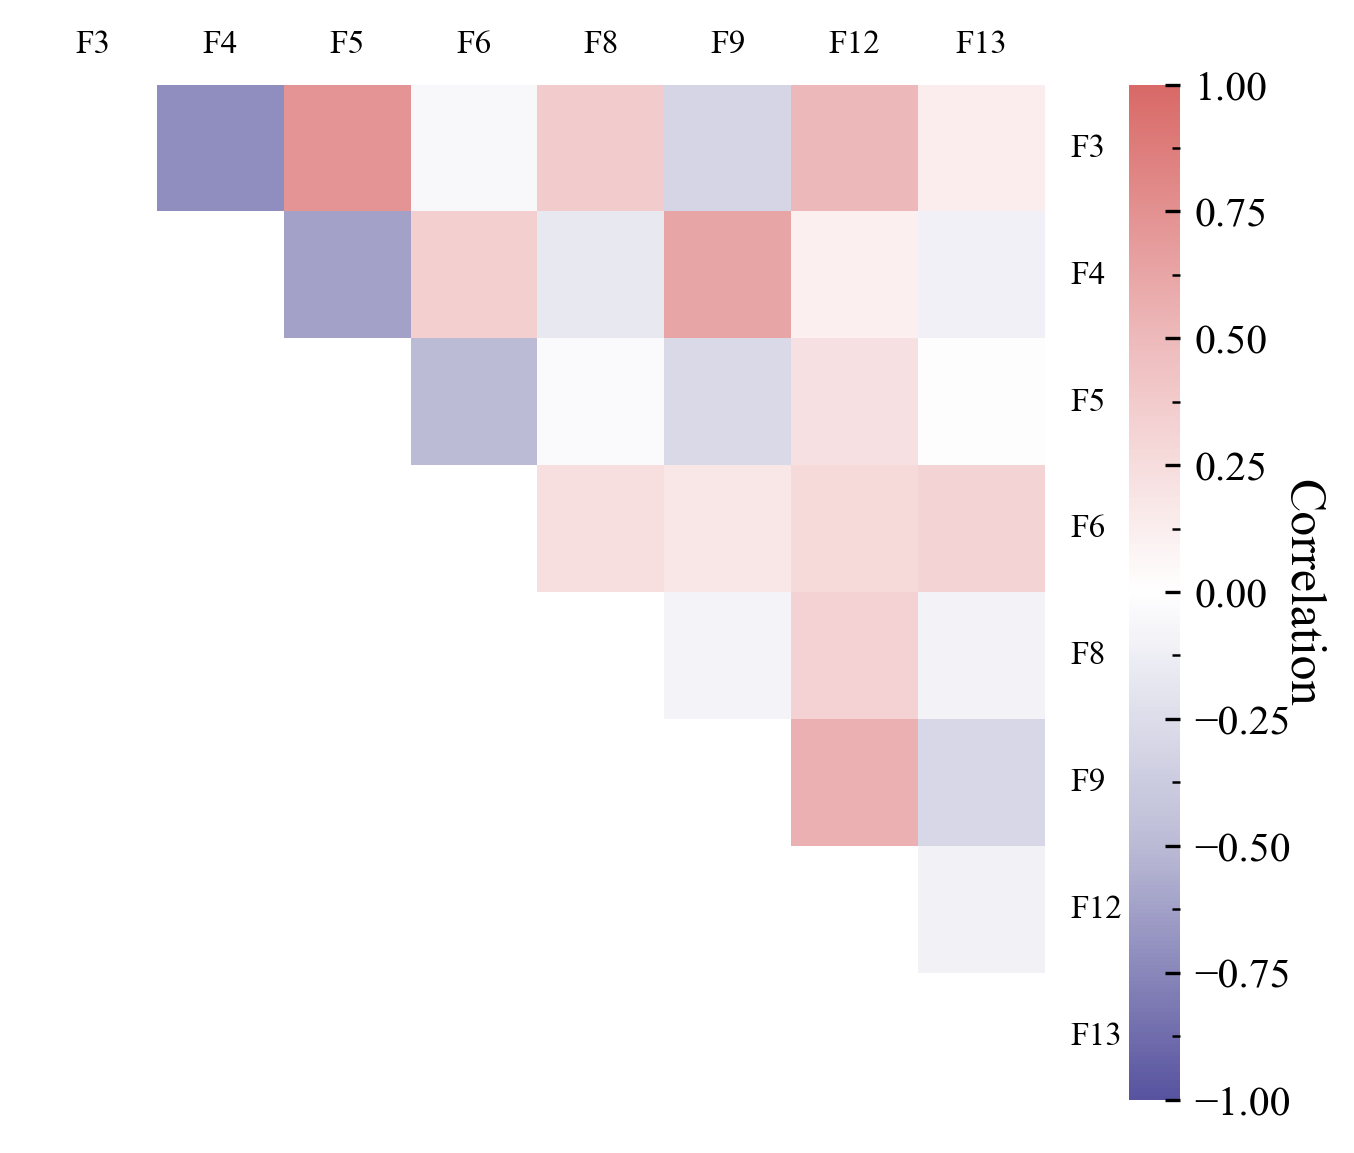

In [21]:
fig,ax=plt.figure(figsize=(cm(15),cm(10)),dpi=300),plt.gca()
half_plot_set(ax)

# 创建一个下三角形遮罩
mask = np.tril(np.ones_like(data_features_low_corr.corr(), dtype=bool))

# 创建自定义颜色映射
cmap = colors.LinearSegmentedColormap.from_list("", ["#58539f", "#bbbbd6", "white", "#eebabb", "#d86967"])


# 绘制热力图，将遮罩传递给参数 'mask'
ax = sns.heatmap(data_features_low_corr.corr(), mask=mask, annot=False, square=True, xticklabels=False, yticklabels=False, cmap=cmap, vmin=-1, vmax=1, cbar=False)

feature_names_low_corr = data_features_low_corr.columns
n_features_low_corr = len(feature_names_low_corr)


# 获取原始特征名
original_feature_names = data_features_low_corr.columns.tolist()
n_features = len(original_feature_names)

# 创建简化的特征名 F1, F2, F3...
short_feature_names = [f'F{i+1}' for i in range(n_features)]

# 创建对应表字典
feature_mapping = {short_feature_names[i]: original_feature_names[i] for i in range(n_features)}

# 在热力图上方添加特征名称
for i, feature_name in enumerate(original_feature_names):
    feature_name = feature_mapping_v[feature_name]
    # 计算文字位置
    x_pos = i + 0.5
    y_pos = - 0.2

    # 添加文字，设置旋转角度和对齐方式
    ax.text(x_pos, y_pos, feature_name, rotation=0, ha="center", va="bottom", fontsize=8, transform=ax.transData)
    x_pos = n_features_low_corr +0.2
    y_pos = i+0.5
    ax.text(x_pos, y_pos, feature_name, rotation=0, ha="left", va="center", fontsize=8, transform=ax.transData)

# 去除颜色条的边框并设置长度和图片相同
cbar = plt.colorbar(ax.get_children()[0], ax=ax, aspect=20, shrink=1.0, location='right', use_gridspec=True)
cbar.set_label('Correlation', rotation=270, labelpad=8,fontsize=12)
cbar.set_ticks(np.linspace(-1,1,9),minor=True) # 设置颜色条刻度
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # 设置颜色条的次刻度
# cbar.ax.tick_params(labelsize=7)  # 设置颜色条刻度字体大小
# half_plot_set(cbar.ax)

# 显示图像
plt.tight_layout()

In [22]:
fig.savefig(save_dir / "feature_correlation1.jpg", dpi=1200, bbox_inches='tight')


特征对应表 (Feature Mapping):
F1    | MagpieData maximum AtomicWeight       
F2    | MagpieData maximum Column             
F3    | MagpieData maximum CovalentRadius     
F4    | MagpieData maximum Electronegativity  
F5    | MagpieData maximum GSvolume_pa        
F6    | MagpieData maximum MeltingT           
F7    | MagpieData maximum MendeleevNumber    
F8    | MagpieData maximum NUnfilled          
F9    | MagpieData maximum NValence           
F10   | MagpieData maximum NdValence          
F11   | MagpieData maximum Number             
F12   | MagpieData maximum Row                
F13   | MagpieData maximum SpaceGroupNumber   


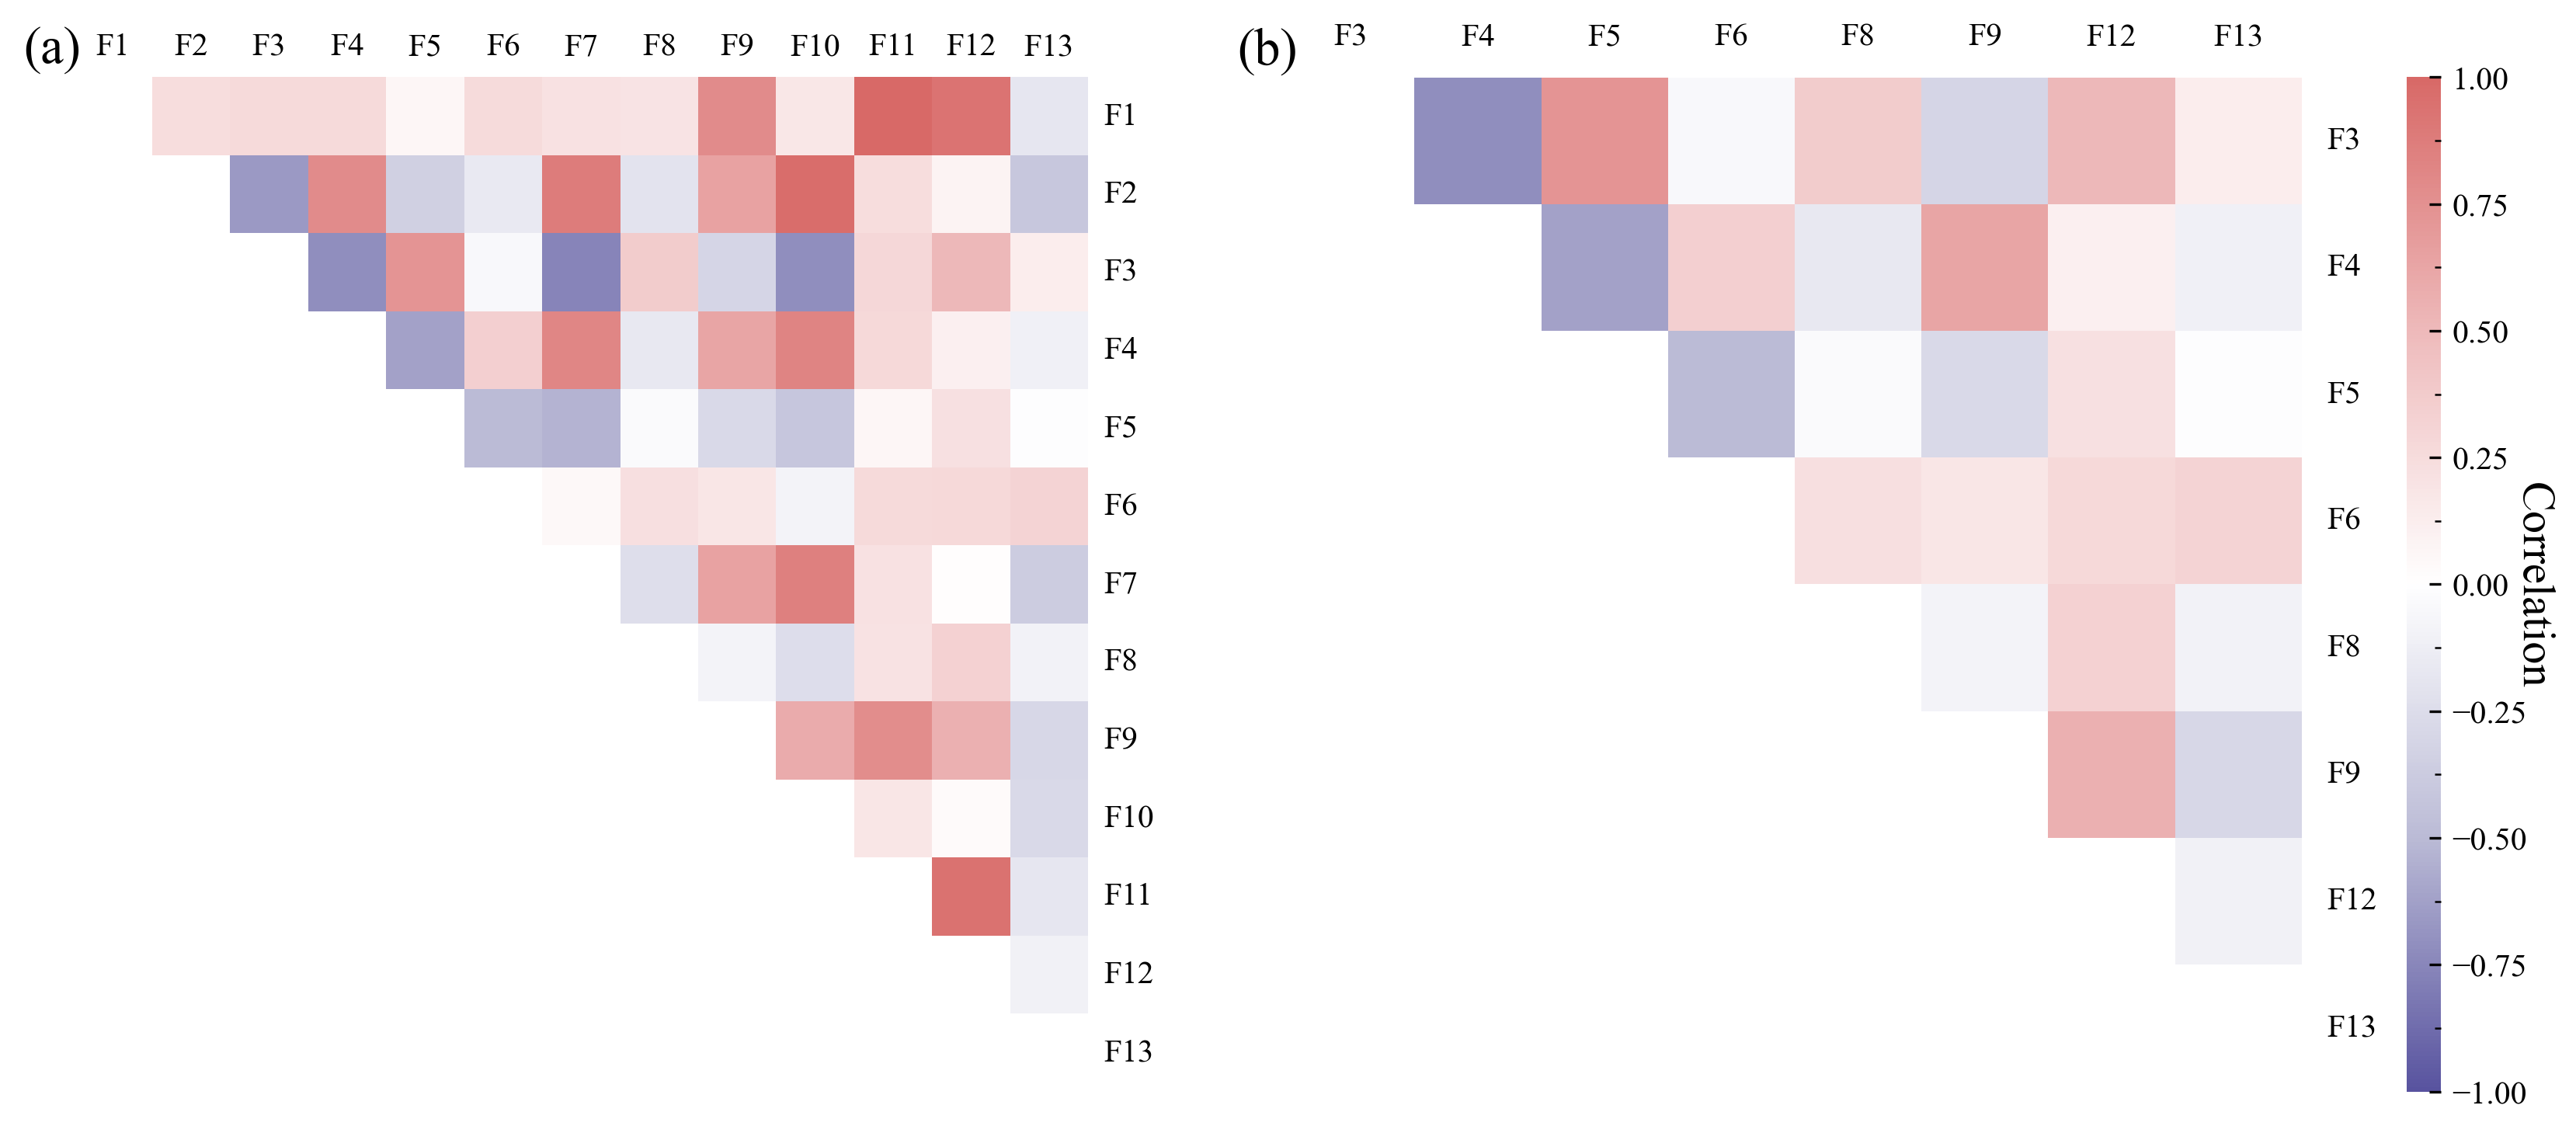

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(cm(30), cm(12.5)), dpi=300)
ax = axs[0]
ax.text(-0.05, 1.05, "(a)", transform=ax.transAxes, fontsize=16, verticalalignment='top')
# 创建一个下三角形遮罩
mask = np.tril(np.ones_like(df_feature_corr, dtype=bool))

# 创建自定义颜色映射
cmap = colors.LinearSegmentedColormap.from_list("", ["#58539f", "#bbbbd6", "white", "#eebabb", "#d86967"])


# 绘制热力图，将遮罩传递给参数 'mask'
ax = sns.heatmap(
    df_feature_corr,
    mask=mask,
    annot=False,
    square=True,
    xticklabels=False,
    yticklabels=False,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    cbar=False,
    ax=ax,
)

original_feature_names = df_feature_corr.columns.tolist()
n_features = len(original_feature_names)

# 创建简化的特征名 F1, F2, F3...
short_feature_names = [f"F{i + 1}" for i in range(n_features)]

# 创建对应表字典
feature_mapping = {short_feature_names[i]: original_feature_names[i] for i in range(n_features)}

# 在热力图上方添加特征名称
for i, feature_name in enumerate(short_feature_names):
    # 计算文字位置
    x_pos = i + 0.5
    y_pos = -0.2

    # 添加文字，设置旋转角度和对齐方式
    ax.text(x_pos, y_pos, feature_name, rotation=0, ha="center", va="bottom", fontsize=10, transform=ax.transData)
    x_pos = n_features + 0.2
    y_pos = i + 0.5
    ax.text(x_pos, y_pos, feature_name, rotation=0, ha="left", va="center", fontsize=10, transform=ax.transData)
# 打印特征对应表
print("\n" + "=" * 80)
print("特征对应表 (Feature Mapping):")
print("=" * 80)

# 确定列宽
max_short_len = max(len(name) for name in short_feature_names)
max_original_len = max(len(name) for name in original_feature_names)

for short_name, original_name in feature_mapping.items():
    print(f"{short_name:<{max_short_len + 2}} | {original_name:<{max_original_len + 2}}")


ax = axs[1]
# 创建一个下三角形遮罩
mask = np.tril(np.ones_like(data_features_low_corr.corr(), dtype=bool))

# 创建自定义颜色映射
cmap = colors.LinearSegmentedColormap.from_list("", ["#58539f", "#bbbbd6", "white", "#eebabb", "#d86967"])


# 绘制热力图，将遮罩传递给参数 'mask'
ax = sns.heatmap(
    data_features_low_corr.corr(),
    mask=mask,
    annot=False,
    square=True,
    xticklabels=False,
    yticklabels=False,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    cbar=False,
    ax = ax

)
ax.text(-0.05, 1.05, "(b)", transform=ax.transAxes, fontsize=16, verticalalignment='top')

feature_names_low_corr = data_features_low_corr.columns
n_features_low_corr = len(feature_names_low_corr)


# 获取原始特征名
original_feature_names = data_features_low_corr.columns.tolist()
n_features = len(original_feature_names)

# 创建简化的特征名 F1, F2, F3...
short_feature_names = [f"F{i + 1}" for i in range(n_features)]

# 创建对应表字典
feature_mapping = {short_feature_names[i]: original_feature_names[i] for i in range(n_features)}

# 在热力图上方添加特征名称
for i, feature_name in enumerate(original_feature_names):
    feature_name = feature_mapping_v[feature_name]
    # 计算文字位置
    x_pos = i + 0.5
    y_pos = -0.2

    # 添加文字，设置旋转角度和对齐方式
    ax.text(x_pos, y_pos, feature_name, rotation=0, ha="center", va="bottom", fontsize=10, transform=ax.transData)
    x_pos = n_features_low_corr + 0.2
    y_pos = i + 0.5
    ax.text(x_pos, y_pos, feature_name, rotation=0, ha="left", va="center", fontsize=10, transform=ax.transData)
# ax.set_facecolor('lightgray')
# 去除颜色条的边框并设置长度和图片相同
cbar = plt.colorbar(
    ax.get_children()[0],
    ax=ax,
    aspect=30,
    shrink=1.0,
    location="right",
    use_gridspec=True,
    pad=0.08  # 增大与主图的间距，默认是0.02
)
cbar.set_label("Correlation", rotation=270, labelpad=8, fontsize=14)

cbar.outline.set_visible(False)
cbar.ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # 设置颜色条的次刻度
# half_plot_set(cbar.ax)

plt.subplots_adjust(wspace=0)
# 显示图像
plt.tight_layout()


In [25]:
fig.savefig(save_dir / "feature_correlation_comparison.jpg", dpi=1200, bbox_inches='tight')

# REF交叉验证

In [26]:
data_features=pd.read_csv(save_dir/"data_Features_low_corr.csv")
y_train=df["y"]
data_features

,MagpieData maximum CovalentRadius,MagpieData maximum Electronegativity,MagpieData maximum GSvolume_pa,MagpieData maximum MeltingT,MagpieData maximum NUnfilled,MagpieData maximum NValence,MagpieData maximum Row,MagpieData maximum SpaceGroupNumber
0,145.0,1.930,16.330000,1234.93,1.0,11.0,5.0,225.0
1,136.0,2.540,16.700000,1337.33,1.0,25.0,6.0,225.0
2,215.0,0.890,63.590000,1000.00,0.0,2.0,6.0,229.0
3,96.0,1.570,7.890000,1560.00,0.0,2.0,2.0,194.0
4,148.0,2.020,32.950000,544.40,3.0,29.0,6.0,12.0
5,176.0,1.000,37.770000,1115.00,0.0,2.0,4.0,225.0
6,144.0,1.690,19.495000,594.22,0.0,12.0,5.0,194.0
7,204.0,1.120,37.240000,1071.00,22.0,4.0,6.0,194.0
8,126.0,1.880,10.245000,1768.00,3.0,9.0,4.0,194.0
9,139.0,1.660,11.190000,2180.00,6.0,6.0,4.0,229.0


In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE

In [29]:
num_of_features = data_features.shape[1]

kf = KFold(n_splits=5, random_state=42, shuffle=True)

mse_values = []
mse_std_values = []
feature_sets = []

for i in tqdm(range(num_of_features, 0, -1), desc="RFE"):
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    rfe.fit(data_features, y_train)

    selected_features = data_features.columns[rfe.support_]
    X_temp = data_features[selected_features]
    mse_score = cross_val_score(model, X_temp, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs =- 1)  # 计算10折交叉验证的MSE
    mse_values.append(-mse_score.mean())  # 将负的MSE转为正的
    mse_std_values.append(mse_score.std())
    feature_sets.append(list(selected_features))

results_df = pd.DataFrame({
    'Number of Features': range(num_of_features, 0, -1),
    'Mean MSE': mse_values,
    'MSE Std': mse_std_values,#在项目中可以不用标准差
    'Features': feature_sets
})

results_df_RFE = results_df.sort_values(by='Number of Features')  # 按特征数量排序结果，以便绘图

RFE: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


In [30]:
RFE_MSE = results_df.sort_values(by='Mean MSE')  # 按特征数量排序结果，以便绘图
RFE_MSE.reset_index(drop=True, inplace=True)
RFE_MSE.to_csv(save_dir/"RFE_MSE.csv", index=False)
RFE_MSE

,Number of Features,Mean MSE,MSE Std,Features
0,5,0.912351,0.643282,"[MagpieData maximum CovalentRadius, MagpieData..."
1,8,0.914489,0.590949,"[MagpieData maximum CovalentRadius, MagpieData..."
2,7,0.915356,0.663525,"[MagpieData maximum CovalentRadius, MagpieData..."
3,6,0.932583,0.612156,"[MagpieData maximum CovalentRadius, MagpieData..."
4,4,0.991175,0.659914,"[MagpieData maximum CovalentRadius, MagpieData..."
5,3,1.128991,0.649101,"[MagpieData maximum CovalentRadius, MagpieData..."
6,2,1.385209,1.223858,"[MagpieData maximum Electronegativity, MagpieD..."
7,1,3.384921,1.977118,[MagpieData maximum GSvolume_pa]


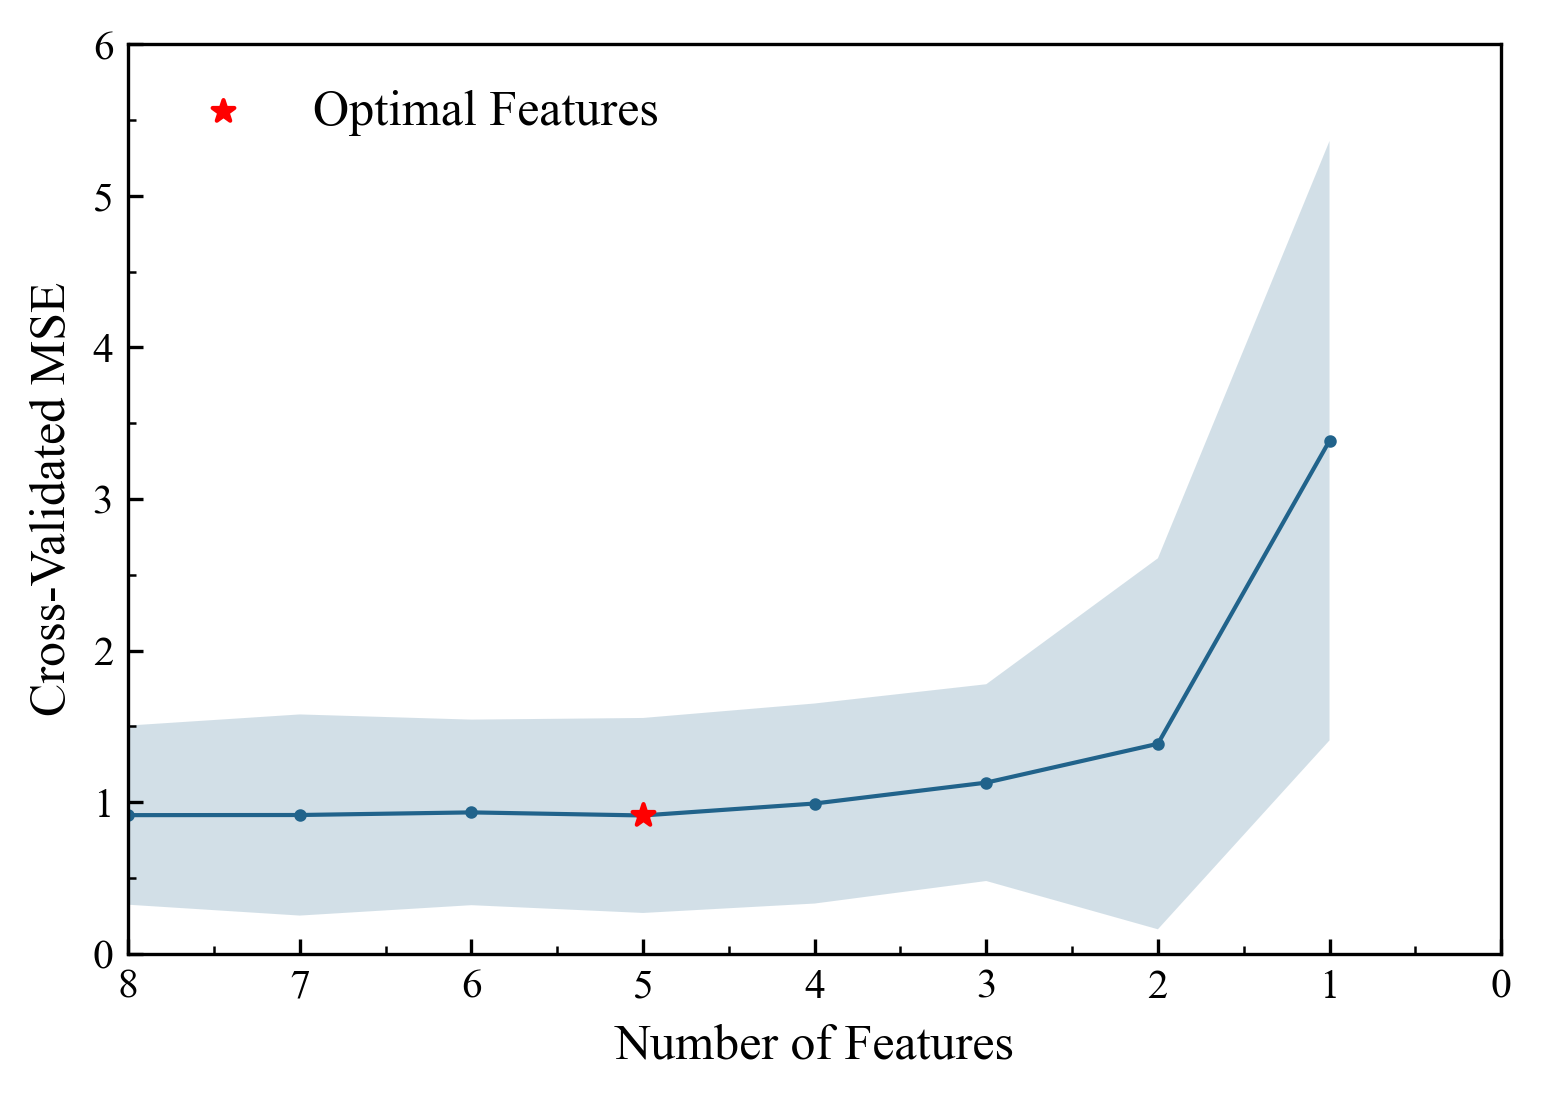

In [31]:
# 绘图
fig,ax=plt.figure(figsize=(cm(15), cm(10)), dpi=300),plt.gca()
x = results_df_RFE['Number of Features'].values
mean_mse = results_df_RFE['Mean MSE'].values
mse_std = results_df_RFE['MSE Std'].values

plt.plot(x, mean_mse, '-o', color='#21638B', markersize=2, linewidth=1)
min_mse_index = np.argmin(mean_mse)
plt.scatter(x[min_mse_index], mean_mse[min_mse_index], color='red', s=30, marker='*', label='Optimal Features', zorder=5)
plt.legend(fontsize=12, loc='upper left', frameon=False)

plt.fill_between(x, mean_mse - mse_std, mean_mse + mse_std, color='#21638B', alpha=0.2, edgecolor=None)
ax.invert_xaxis()
plt.xlabel('Number of Features',fontsize=12)
plt.ylabel('Cross-Validated MSE',fontsize=12)
set_ticks(ax,(8,0,-1),(0,6,1))

In [32]:
fig.savefig(save_dir / "RFE_MSE.png", dpi=1200, bbox_inches='tight')

|特征|描述|翻译|单位|来源|
|---|---|---|---|---|
|MagpieData CovalentRadius|Covalent radius of each element|每个元素的共价半径|pm|Mathematica|
|MagpieData Electronegativity|Pauling electronegativity|鲍林电负性||Mathematica
|MagpieData GSvolume_pa|DFT volume per atom of T=0K ground state|T=0K 基态的每个原子的 DFT 体积|$Å^3/atom$|OQMD|
|MagpieData MeltingT|Melting temperature of element|元素的熔点|K|Mathematica|
|MagpieData MendeleevNumber|Mendeleev Number (position on the periodic table, counting columnwise from H)|门捷列夫数（周期表上的位置，从H开始按列计数）||Mathematica|